In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [5]:
(X_train,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
#sacaling 
X_train =X_train/255
X_test =X_test/255

//visualization

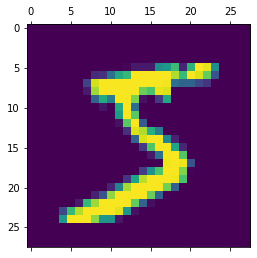

In [9]:
plt.matshow(X_train[0])

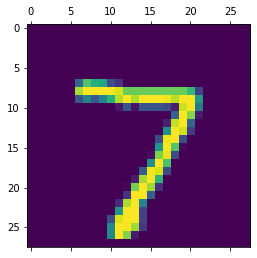

In [10]:
plt.matshow(X_test[0])

In [11]:
np.unique(y_test,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
X_train_flatten =X_train.reshape(len(X_train),28*28)
X_test_flatten =X_test.reshape(len(X_test),28*28)
print("Shapes:")
print('X_train_flatten :',X_train_flatten.shape)
print('X_test_flatten  :',X_test_flatten.shape)

Shapes:
X_train_flatten : (60000, 784)
X_test_flatten  : (10000, 784)


In [13]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
##no hidden layers

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [16]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4617 - accuracy: 0.8807
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.9211: 0s - loss: 0.2846 - accura
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================]

In [17]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 916us/step - loss: 0.2664 - accuracy: 0.9268


[0.26635998487472534, 0.926800012588501]

In [18]:
y_pred=model.predict(X_test_flatten)
y_pred[0]

array([3.8809776e-03, 2.4648191e-08, 2.8522432e-02, 9.6725595e-01,
       1.5594959e-03, 1.5177166e-01, 5.5151048e-08, 9.9985397e-01,
       7.9144210e-02, 6.6275579e-01], dtype=float32)

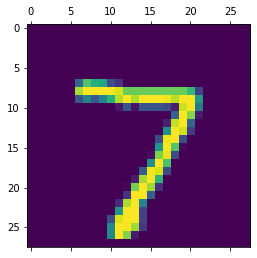

In [19]:
plt.matshow(X_test[0])

In [20]:
np.argmax(y_pred[0])

7

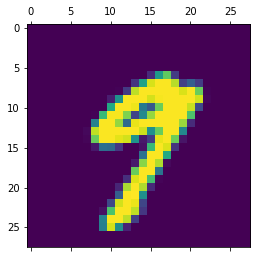

In [21]:
plt.matshow(X_test[20])

In [22]:
np.argmax(y_pred[20])

9

In [23]:
#checking the unique values .
np.unique(y_test,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [24]:
##coverting the y_pred values lables as y_test
y_pred_label =[np.argmax(i) for i in y_pred]
np.unique(y_pred_label,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [25]:
#confusion matrix
cm =tf.math.confusion_matrix(y_test,y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    6,    9,    3,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   6,   11,  928,   16,    8,    4,   15,   10,   30,    4],
       [   3,    0,   16,  928,    0,   23,    4,   10,   19,    7],
       [   1,    2,    2,    2,  907,    0,   15,    6,    9,   38],
       [  10,    3,    3,   31,    8,  781,   18,    8,   24,    6],
       [   9,    3,    4,    1,    7,    9,  922,    2,    1,    0],
       [   1,    9,   25,    7,    6,    0,    0,  953,    1,   26],
       [   9,   15,    6,   25,    8,   27,   12,   11,  851,   10],
       [  11,    8,    1,   11,   22,    8,    0,   22,    4,  922]])>

[]

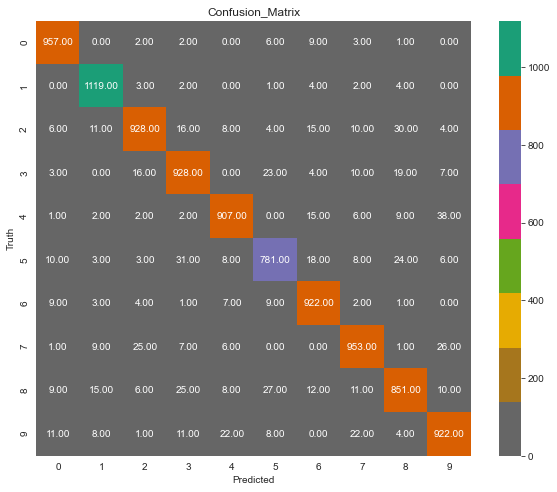

In [26]:
##heatplot confusion_matrix
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.title("Confusion_Matrix")
sns.heatmap(cm,cbar=True,square=True,annot=True,annot_kws={'size':10},cmap='Dark2_r',fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.plot()

In [27]:
#applying hidden layers

In [28]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flatten,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.9210


In [29]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1504 - accuracy: 0.9565


[0.150360107421875, 0.9564999938011169]

In [30]:
y_pred =model.predict(X_test_flatten)
y_pred[0]

array([2.3630613e-01, 5.6534708e-03, 8.3881027e-01, 9.2988205e-01,
       5.8156252e-04, 3.7466639e-01, 5.3952328e-05, 9.9985385e-01,
       9.0279907e-02, 3.9386600e-01], dtype=float32)

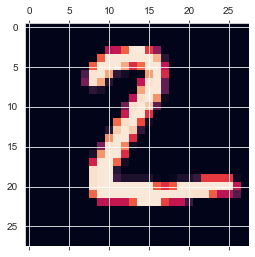

In [31]:
plt.matshow(X_test[1])

In [32]:
np.argmax(y_pred[1])

2

In [33]:
##coverting the y_pred values lables as y_test
y_pred_label =[np.argmax(i) for i in y_pred]
np.unique(y_pred_label,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

[]

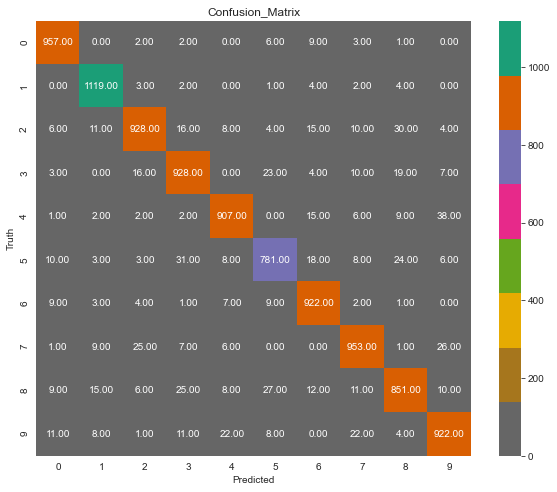

In [34]:
##heatplot confusion_matrix
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.title("Confusion_Matrix")
sns.heatmap(cm,cbar=True,square=True,annot=True,annot_kws={'size':10},cmap='Dark2_r',fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.plot()